<a href="https://colab.research.google.com/github/Tower5954/Intro_to_tensorflow/blob/main/00_tensorflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, we're going to cover some of the most fundamental concepts of tensors using TensorFlow

More specifically, we will cover:
* Introductuction to tensors
* Getting information from tensors
* Manipulating tensors 
* Tensors & NumPy
* Using @tf.function (a way to speed up your regular Python functions)
* Using GPU's with TensorFlow (or TPU's)





## Introduction to Tensors

### What is a tensor?

Tensors are multi-dimensional arrays with a uniform type (called a dtype). You can see all supported dtypes at tf.dtypes.DType.

If you're familiar with NumPy, tensors are (kind of) like np.arrays.

All tensors are immutable like Python numbers and strings: you can never update the contents of a tensor, only create a new one.

In [ ]:
# Import tensors
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
# Creating tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
# Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [ ]:
# Create a vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
vector.ndim

1

In [ ]:
# Create a matrix (has more than 1 dimension)
matrix = tf.constant([[10, 7],
                      [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
matrix.ndim

2

In [ ]:
# Create another matrix
another_matrix = tf.constant([[10., 7.],
                              [3., 2.],
                              [8., 9.]], dtype=tf.float16) # specify the data type with dtype parameter


another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
another_matrix.ndim

2

In [ ]:
# Create a tensor 
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])

tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
tensor.ndim

3

What we have created so far:

* Scalar: a single number
* Vector: a number with direction (e.g. wind speed and direction)
* Matrix: a 2-dimensional array of numbers
* Tensor: an n-dimensional array of numbers (when n can be any number, a 0-dimensional tensor is a scalar, a 1-dimensional tensor is a vector)



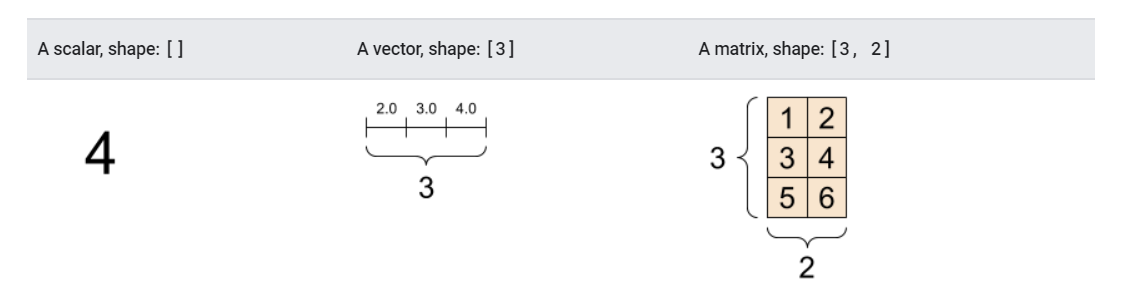

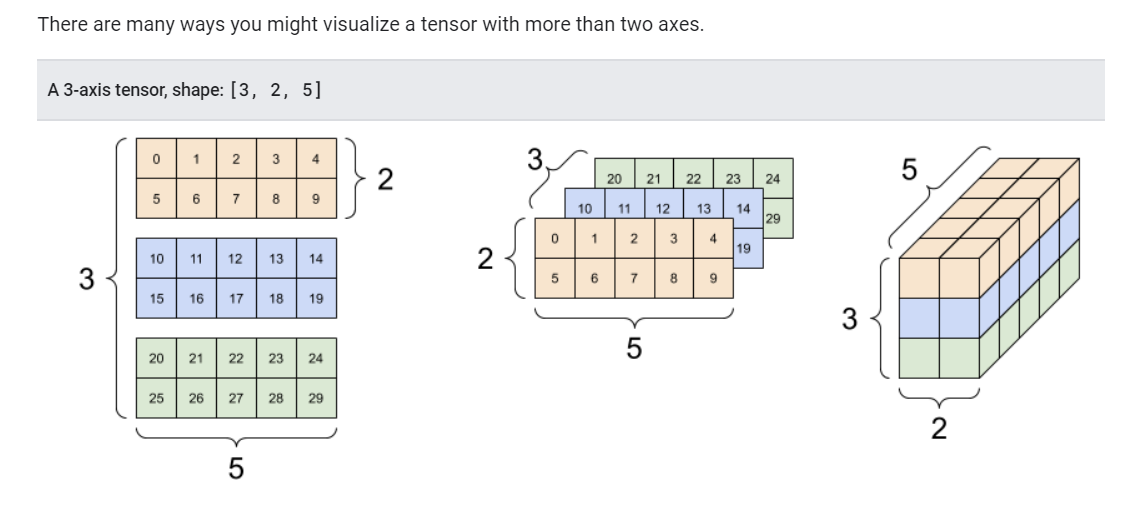

### Creating tensors with `tf.variable()`

In [ ]:
# Create the same tensor with tf.Variable () as above

changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])

In [ ]:
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
# Try to change one of our elements in the changeable tensor
changeable_tensor[0]

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [ ]:
# The following code will run an error:

# changeable_tensor[0] = 7
# changeable_tensor

In [ ]:
# Next we will try another way:

changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [ ]:
# Lets try and change the unchangeable tensor

# The following code will run an error

# unchangeable_tensor[0].assign(7)

**Note** Rarely in practice will you have to decide whether to use `tf.constant` or `tf.Variable` to create tensors, As TensorFlow does this for you.
However, if in doubt, use `tf.constant` and change later if necessary

### Creating random tensors


Random tensors are tensors of some arbitary size which contain random numbers.

**Why?**\
A good example of when we might use random tensors is found in neural networks.
After encoding the image in the input nodes it will then assign random tensors at the hidden level. These will then be 'tweaked' as the results come in.

In [ ]:
# Create two random (but the same) tensors

random_1 = tf.random.Generator.from_seed(42) # set seed for reproducability
random_1 = random_1.normal(shape=(3, 2))
random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [ ]:

random_1 = tf.random.Generator.from_seed(42) 
random_1 = random_1.normal(shape=(3, 2))

random_2 = tf.random.Generator.from_seed(42) 
random_2 = random_2.normal(shape=(3, 2))

In [ ]:
# Are they equal?

random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

### Shuffle the elements in a tensor

This can be valuable when you want to shuffle your data so the inheritant order does not effect learning.


In [ ]:
# Shuffle data

not_shuffled = tf.constant([[10, 7],
                           [3, 4],
                           [2, 5]])

not_shuffled.ndim

2

In [ ]:
# Shuffle our non-shuffled tensor
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed=42)


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [ ]:
tf.random.shuffle(not_shuffled, seed=42)


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
tf.random.set_seed(42)    # Global level random seed
tf.random.shuffle(not_shuffled, seed=42)    # Operation level random seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

If we want our shuffled tensors to be in the same order, We have to use the global level random seed as well as the operation level random seed.

### Other ways to make tensors

In [ ]:
# Create a tensor of all ones
tf.ones([10, 7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [ ]:
# Create a tensor of all zeroes
tf.zeros(shape=(3, 4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Turn NumPy arrays into tensors

The main difference between NumPy arrays and TensorFlow tensors are that tensors can be run on a GPU (much faster for numerical computing).

In [ ]:
# Turning NumPy arrays into tensors
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32)    # Create a NumPy array between 1 and 25
numpy_A

# X = tf.constant(some_matrix) # capital for matrix or tensor
# y = tf.constant(vector) # non-capital for vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
A = tf.constant(numpy_A)
A

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

In [ ]:
A = tf.constant(numpy_A, shape=(2, 3, 4))
A


<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)>

In [ ]:
B = tf.constant(numpy_A)
A, B

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

In [ ]:
B = tf.constant(numpy_A, shape=(3, 8))
A, B 

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(3, 8), dtype=int32, numpy=
 array([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16],
        [17, 18, 19, 20, 21, 22, 23, 24]], dtype=int32)>)

### Getting information from tensors

When dealing with tensors, you should be aware of the following attributes:

* Shape 
* Rank
* Axis or Dimension
* Size

In [ ]:
# Create a rank 4 tensor (4 dimensions)

rank_4_tensors = tf.zeros(shape=[2, 3, 4, 5])
rank_4_tensors

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensors.shape, rank_4_tensors.ndim, tf.size(rank_4_tensors)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
# Get various attributes for our tensors
print("Datatype of every element:", rank_4_tensors.dtype)
print("Number of dimensions (rank):", rank_4_tensors.ndim)
print("Shape of tensor:", rank_4_tensors.shape)
print("Elements along the 0 axis:", rank_4_tensors.shape[0])
print("Elements along the last axis:", rank_4_tensors.shape[-1])
print("Total number of elements in our tensor:", tf.size(rank_4_tensors).numpy())

Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along the 0 axis: 2
Elements along the last axis: 5
Total number of elements in our tensor: 120


### Indexing tensors 

Tensors can be indexed just like in Python lists.

In [ ]:
# Python list
some_python_list = [1, 2, 3, 4, 5]
some_python_list[:2]

[1, 2]

In [ ]:
# Get the first two elements of each dimension

rank_4_tensors[:2, :2, :2, :2, ]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:
# Get the first element from from each dimension from each index except for the final one.

rank_4_tensors[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensors[:1, :1, :, :1]

<tf.Tensor: shape=(1, 1, 4, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         [0.]]]], dtype=float32)>

In [ ]:
rank_4_tensors[:1, :, :1, :1]

<tf.Tensor: shape=(1, 3, 1, 1), dtype=float32, numpy=
array([[[[0.]],

        [[0.]],

        [[0.]]]], dtype=float32)>

In [ ]:
rank_4_tensors[:, :1, :1, :1]

<tf.Tensor: shape=(2, 1, 1, 1), dtype=float32, numpy=
array([[[[0.]]],


       [[[0.]]]], dtype=float32)>

In [ ]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10, 7],
                            [5, 9]])


In [ ]:
rank_2_tensor.shape, rank_2_tensor.ndim, tf.shape(rank_2_tensor)

(TensorShape([2, 2]),
 2,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 2], dtype=int32)>)

In [ ]:
# Get the last element from each row of our rank 2 tensor
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 9], dtype=int32)>

In [ ]:
# Add in extra dimension in our rank 2 tensor
rank_3_tensor = rank_2_tensor[...,tf.newaxis]

In [ ]:
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 5],
        [ 9]]], dtype=int32)>

In [ ]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1)    # -1 means expand the final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 5],
        [ 9]]], dtype=int32)>

In [ ]:
tf.expand_dims(rank_2_tensor, axis=0)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 5,  9]]], dtype=int32)>

In [ ]:
tf.expand_dims(rank_2_tensor, axis=1)

<tf.Tensor: shape=(2, 1, 2), dtype=int32, numpy=
array([[[10,  7]],

       [[ 5,  9]]], dtype=int32)>

In [ ]:
tf.expand_dims(rank_2_tensor, axis=-1)

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 5],
        [ 9]]], dtype=int32)>

### Manipulating tensors (tensor operations)

**Basic operations**

`+`, `-`, `*`, `/`

In [ ]:
# We can add values to a tensor using the addition operator
tensor = tf.constant([[10, 7], [5, 9]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [15, 19]], dtype=int32)>

In [ ]:
# Original tensor is unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 5,  9]], dtype=int32)>

In [ ]:
# Multiplication still works
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 50,  90]], dtype=int32)>

In [ ]:
# We can also use the tensorflow built-in functions
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 50,  90]], dtype=int32)>

**Matrix Multiplication**

In machine learning, matrix multiplication is one of the most common tensor operations.

📖 **Resource** 📖 How a matrix multiplication works with steps http://matrixmultiplication.xyz/

In [ ]:
print(tensor)

tf.Tensor(
[[10  7]
 [ 5  9]], shape=(2, 2), dtype=int32)


In [ ]:
tf.matmul(tensor, tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[135, 133],
       [ 95, 116]], dtype=int32)>

In [ ]:
# Different to element-wise multiplication which would produce this: 
tensor * tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [ 25,  81]], dtype=int32)>

In [ ]:
# Matrix multiplication with python operator @
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[135, 133],
       [ 95, 116]], dtype=int32)>

In [ ]:
# Create a (3, 2) tensor

X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])

In [ ]:
# Create another (3, 2) tensor

Y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])

In [ ]:
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

📖 **Resource** 📖 Info and example of matrix multiplication https://www.

*   List item
*   List item

mathsisfun.com/algebra/matrix-multiplying.html

There are two rules our tensors (or matrices) need to fulfil if we are going to multiply them:
1. The inner dimensions must match
2. The resulting matrix has the shape of the inner dimensions

In [ ]:
# The following code will produce an error:

# X @ Y

Because it does not follow those rules

In [ ]:
# Let's change the shape of Y
Y = tf.reshape(Y, shape=(2, 3))

In [ ]:
# And try again

X @ Y

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
# We can do the same with transpose

tf.transpose(X), tf.reshape(X, shape=(2, 3))

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

**Transpose** mixes up the order by changing the axis.\
**Reshape** changes the shape to the request 

In [ ]:
# Try matrix multiplication with transpose rather than reshape


In [ ]:
Y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])

In [ ]:
tf.matmul(tf.transpose(X), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

**The dot product**

Matrix multiplication is also referred to as the dot product.

We can perform matrix multiplication using:
* `tf.matmul()`
* `tf.tensordot()`

In [ ]:
# Perform the dot product on X and Y (requires X or Y to be transposed)

📖 **Resource** 📖  description on the diffrence between reshape and transpose: https://lihan.me/2018/01/numpy-reshape-and-transpose/

In [ ]:
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [ ]:
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [ ]:
# Perform matrix multiplication between X and Y (transposed)

tf.matmul(X, tf.transpose(Y) )

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [ ]:
# Perform matrix multiplication between X and Y (reshaped)

tf.matmul(X, tf.reshape(Y, shape=(2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
# Check the values of Y, reshape Y, and transposed Y
print("Normal Y")
print(Y, "\n")

print("Y reshaped to (2, 3):")
print(tf.reshape(Y, (2, 3)), "\n" )

print("Y transposed:")
print(tf.transpose(Y))

Normal Y
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2, 3):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


Generally, when performing matrix multiplication on two tensors and one of the axes doesn't line up. You will *transpose* (rather than reshape) one of the tensors to satisfy the matrix multiplication rules.

**Changing the datatype of a tensor**

In [ ]:
# Create a new tensor with default datatype (float32)

B = tf.constant([1.7, 7.4])
B, B.dtype, B.ndim

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 7.4], dtype=float32)>,
 tf.float32,
 1)

In [ ]:
C = tf.constant([7, 10])
C.dtype

tf.int32

In [ ]:
# Change from float32 to float16 (reduced precision)

D = tf.cast(B, dtype=tf.float16)
D, D.dtype, D.ndim

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>,
 tf.float16,
 1)

In [ ]:
# Change from int32 to float32

E = tf.cast(C, dtype=tf.float32)
E, E.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>,
 tf.float32)

In [ ]:
E_float16 = tf.cast(E, dtype=tf.float16)
E_float16.dtype

tf.float16

### Aggregating tensors

Aggregating tensors = Condensing them from multiple values down to a smaller amount of values

In [ ]:
# Get the absolute values

D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [ ]:
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

Let's go through the following forms of aggregation:
* Get the minimum
* Get the maximum
* Get the mean of a tensor
* Get the sum of a tensor

In [ ]:
# Create a random tensor with values between 0 and 100, size = 50

E = tf.constant(np.random.randint(0, 100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([61, 96, 19, 60, 12, 67, 22, 39, 15, 64, 23, 27, 27, 84, 77, 36,  9,
       73, 19, 24, 12, 67, 77,  2,  1, 35, 98, 17, 54, 33, 38, 42, 58, 83,
       12, 18, 12,  8, 27, 40, 67, 65, 24, 79, 17, 26,  0, 68, 31, 33])>

In [ ]:
tf.size(E), E.shape, E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [ ]:
# Find the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [ ]:
# Find the maximum

tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=98>

In [ ]:
# Find the Mean

tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=39>

In [ ]:
# Find the Sum

tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=1998>

In [ ]:
# standard deviation and variance

In [ ]:
import tensorflow_probability as tfp

In [ ]:
tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=int64, numpy=720>

In [ ]:
#####------- won't work------######
#    tf.math.reduce_std(E)

In [ ]:
tf.math.reduce_std(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=26.81713>

### Find the positional minimum and maximum

In [ ]:
# Create a new tensor for finding positional minimum and maximum
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [ ]:
# Find the positional maximum
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [ ]:
# Index on largest value
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [ ]:
# Find the maximum value of F
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [ ]:
# Check for equality

assert F[tf.argmax(F)] == tf.reduce_max(F)

In [ ]:
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Find the positional minimum
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [ ]:
# find the min using the minimum index
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

### Squeezing a tensor (removing all single dimensions)

In [ ]:
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1, 1, 1, 1, 50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [ ]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [ ]:
G_squeezed = tf.squeeze(G)
G_squeezed

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [ ]:
G_squeezed.shape

TensorShape([50])

### One-hot encoding tensors

In [ ]:
# Create a list of indices

some_list = [0, 1, 2, 3] # Could be red, green, yellow, blue

# One hot encode our list of indices

tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [ ]:
# Specify custom values for one hot encoding 

tf.one_hot(some_list, depth=4, on_value="correct", off_value="negative")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'correct', b'negative', b'negative', b'negative'],
       [b'negative', b'correct', b'negative', b'negative'],
       [b'negative', b'negative', b'correct', b'negative'],
       [b'negative', b'negative', b'negative', b'correct']], dtype=object)>

### Squaring, Log, Square root

In [ ]:
# Create a new tensor

H = tf.range(1, 10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [ ]:
# Square the elements

tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [ ]:
# Find the square root 

 # -------  tf.sqrt(H) ------ will error

In [ ]:
tf.sqrt(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.99999994, 1.4142134 , 1.7320508 , 1.9999999 , 2.236068  ,
       2.4494896 , 2.6457512 , 2.8284268 , 3.        ], dtype=float32)>

In [ ]:
# Find the log

tf.math.log(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

In [ ]:
tf.cumsum(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32)>

In [ ]:
tf.negative(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([-1, -2, -3, -4, -5, -6, -7, -8, -9], dtype=int32)>

In [ ]:
tf.math.sin(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([ 0.841471  ,  0.9092974 ,  0.14112   , -0.7568025 , -0.9589243 ,
       -0.2794155 ,  0.6569866 ,  0.98935825,  0.4121185 ], dtype=float32)>

### Tensors and NumPys


TensorFlow works well with NumPy arrays.

In [ ]:
# Create a tensor directly from a NumPy array

J = tf.constant(np.array([3., 7., 10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [ ]:
# Convert our tensor back to a NumPy array

np.array(J)

array([ 3.,  7., 10.])

In [ ]:
type(np.array(J))

numpy.ndarray

In [ ]:
# Convert tensor J to a NumPy array

J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [ ]:
# The default types are slightly different

numpy_J = tf.constant(np.array([3., 7., 10]))
tensor_J = tf.constant([3., 7., 10])

# Check the datatypes of each

numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

### Finding access to GPUs

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
tf.config.list_physical_devices("GPU")

[]

In [ ]:
# SELECT Runtime, change runtime type and SELECT GPU.
# note this will reset all cells

In [ ]:
import tensorflow as tf

tf.config.list_physical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!nvidia-smi

Thu Oct 28 10:40:34 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    29W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

🔑 **NOTE:** If you have access to a CUDA-enabled GPU, Tensorflow will automatically use it whenever possible 🔑 